# Importing Libraries and Creating a Recent Dataframe

In [1]:
# Import libraries and read data into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet('../zippedData/merged_data.parquet')

# Create dataframe filtered by last 10 years of data
recent = df.loc[df.release_date.dt.year >= 2012]

## Exploring Genre vs. ROI

In [2]:
# Create dataframe expanded along genres using pd.explode
expanded_genres = recent.explode('genres')

### Genre vs. Mean ROI

In [3]:
# Create dataframe grouped by genres with mean ROI, mean product budget, and a count of titles in the genre
groupby_genres_mean = expanded_genres.groupby('genres').agg({'ROI': 'mean', 'prod_budget': 'mean', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_mean.title = groupby_genres_mean.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_mean = groupby_genres_mean.loc[groupby_genres_mean.title >= 75]

# Create a dataframe that represents the top 6 genres by mean ROI
top_6_by_mean = groupby_genres_mean.nlargest(6, 'ROI')

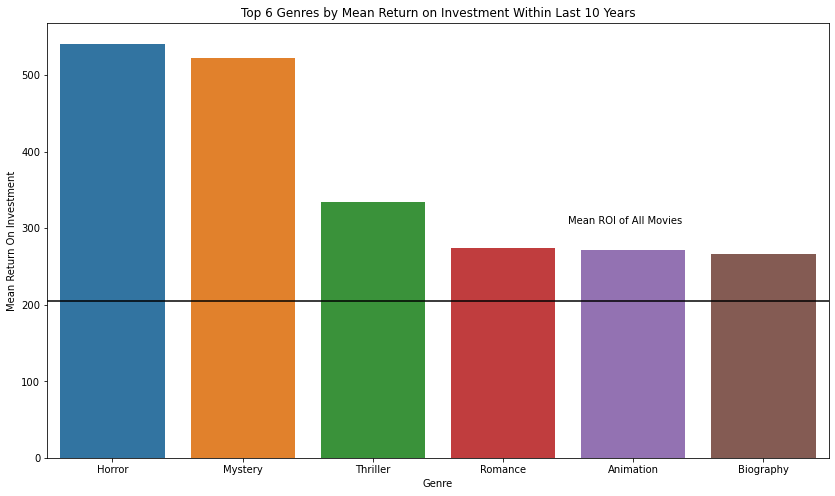

In [4]:
# Create a bar plot representing the top 6 genres by mean ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_mean, x=top_6_by_mean.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 6 Genres by Mean Return on Investment Within Last 10 Years')

# Create a horizontal line representing the mean ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.mean(), c='k')
ax.annotate('Mean ROI of All Movies',(3.5, float(recent.ROI.mean()) + 100));

### Genre vs. Median ROI

In [5]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 75 titles in data set
groupby_genres_median = groupby_genres_median.loc[groupby_genres_median.title >= 75]

# Create a dataframe that represents the top 6 genres by median ROI
top_6_by_median = groupby_genres_median.nlargest(6, 'ROI')

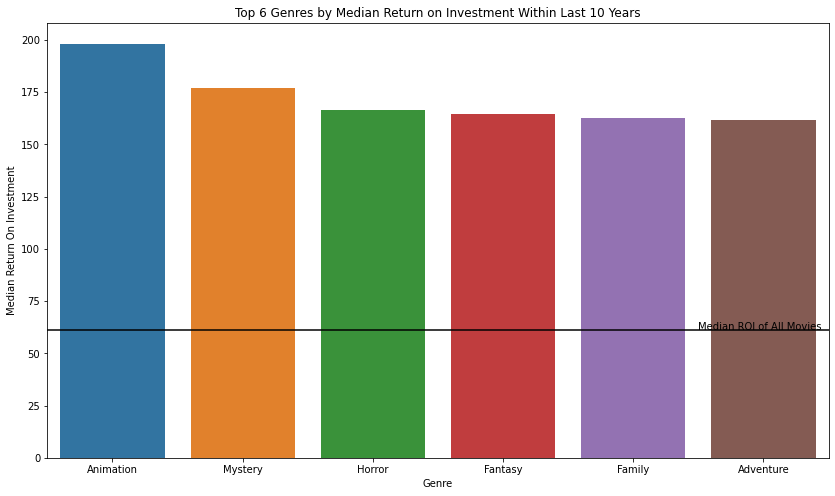

In [6]:
# Create a bar plot representing the top 6 genres by median ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_median, x=top_6_by_median.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 6 Genres by Median Return on Investment Within Last 10 Years')

# Create a horizontal line representing the median ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.median(), c='k')
ax.annotate('Median ROI of All Movies',(4.5, recent.ROI.median()));

### Distribution of ROIs by Genre

In [7]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [8]:
# Declare a set of genres to evaluate (selected from the combined list of top 6 by median and top 6 by mean)
genres_to_evaluate = set(list(top_6_by_mean.index))
for item in list(top_6_by_median.index):
    genres_to_evaluate.add(item)
genres_to_evaluate = list(genres_to_evaluate)

# Create dataframes representing the top 9 genres and the 6 genres by median (less influenced by outliers)
top_9_genres_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(genres_to_evaluate)]
top_6_genres_by_median_raw_ROI = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres.isin(list(top_6_by_median.index))]

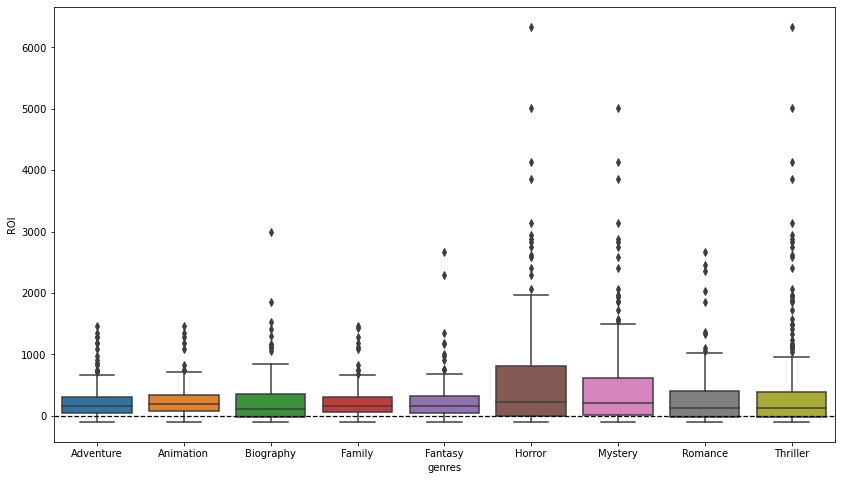

In [9]:
# Create boxplots for each of the top 9 genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn boxplot
sns.boxplot(data=top_9_genres_raw_ROI, x='genres', y='ROI', ax=ax)

# Create a horizontal line at ROI = 0 for clarity
ax.axhline(y=0, linestyle='--', linewidth=1.25, c='k');

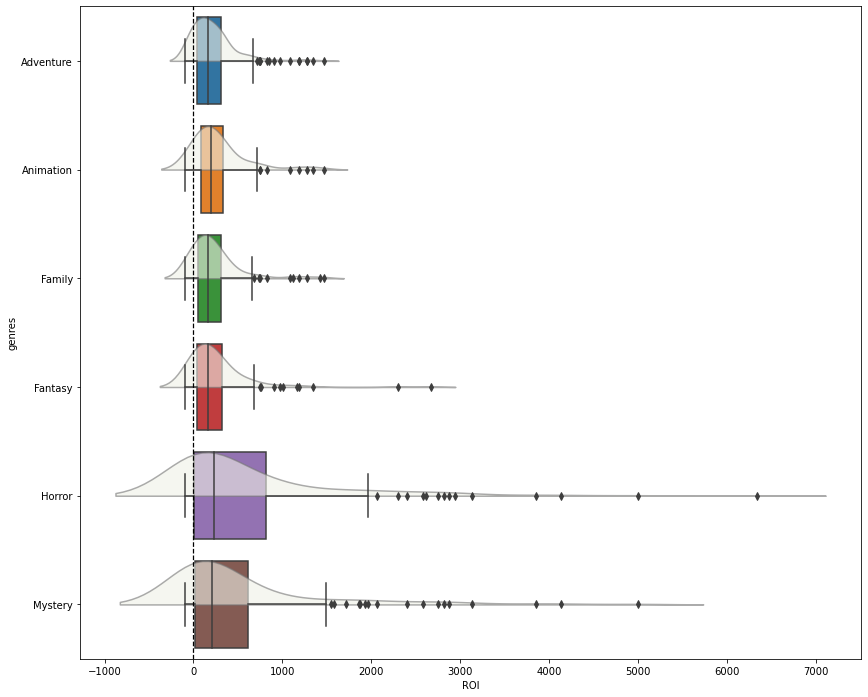

In [10]:
# Create an overlaid boxplot and violinplot for the top 6 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,12))

# Create seaborn boxplot
sns.boxplot(data=top_6_genres_by_median_raw_ROI, y='genres', x='ROI', orient='h', ax=ax)

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data=top_6_genres_by_median_raw_ROI,
               orient='h',
               y='genres',
               x='ROI',
               inner='box',
               hue=True,
               hue_order = [True,False],
               split=True,
               color='#e7f294',
               ax=ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha=0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x=0, c='k', linestyle='--', linewidth=1.25);


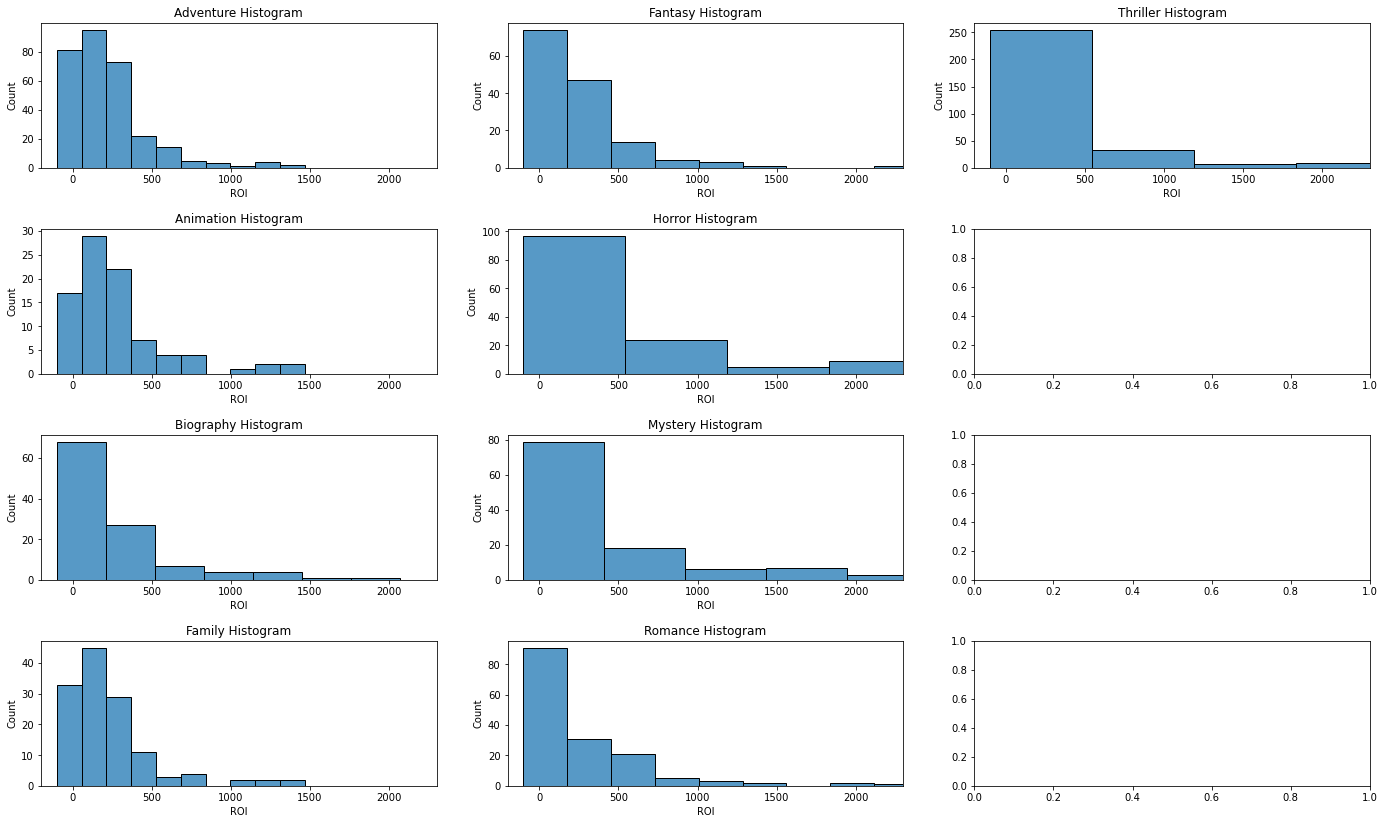

In [11]:
# Create a set of histograms for each of the top 9 genres in one figure
# Declare fig, ax objects, use 4 by 3 shape to accomodate 9 plots
fig, ax = plt.subplots(4,3, figsize=(20,12))

# Set tight layout with padding so labels do not overlap
plt.tight_layout(pad = 4.0)

# For each genre, create a seaborn histplot with 10 bins and correct title labels
for index, genre in enumerate(list(top_9_genres_raw_ROI.genres.unique())):
    axis = ax[index % 4][index // 4]
    sns.histplot(data = top_9_genres_raw_ROI,
                 x = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_xlim([-200, 2300])
    axis.set_title('{} Histogram'.format(genre));

# Show plot
plt.show()

## Exploring Runtime vs. ROI

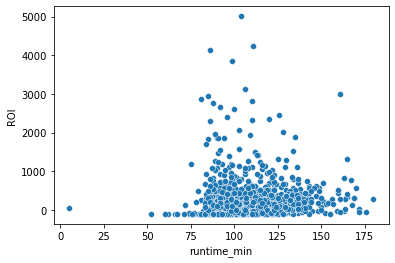

In [12]:
# Create seaborn scatterplot of runtime_min vs. ROI
# Not much semblance of correlation - if you are between ~90 and ~135 minutes (which is almost every movie), you make money
# Runtimes are all pretty close, the spread is not significant enough to try to separate into categorical "bins"
sns.scatterplot(data=recent, x='runtime_min', y='ROI');

## Exploring Yearly Change in Median ROI by Genre

In [13]:
# Investigation into yearly change in median ROI year over year
# Copy base dataframe
yearly_diff_df = df.copy()

# Create new year column based off of year attribute of release_date column
yearly_diff_df['year'] = yearly_diff_df.release_date.dt.year

# Explode along genres for aggregation purposes
yearly_diff_df = yearly_diff_df.explode('genres')

# Group by year, then genres, aggregate ROI according to median and title according to count
# Reset index to bring year and genres back out as rows
yearly_diff_df = yearly_diff_df.groupby(['year','genres']).agg({'ROI': 'median', 'title': 'count'}).reset_index()

# Remove all places where genre == 'None' by slicing
yearly_diff_df = yearly_diff_df.loc[yearly_diff_df.genres != 'None']

# Sort values by genre then year to order rows for diff function
yearly_diff_df = yearly_diff_df.sort_values(['genres', 'year'])

# Create new column representing yearly difference in median ROI using diff function
yearly_diff_df['yearly_diff'] = yearly_diff_df.ROI.diff()

# Slice to only include years 2014-present
yearly_diff_df = yearly_diff_df.loc[yearly_diff_df.year > 2013]

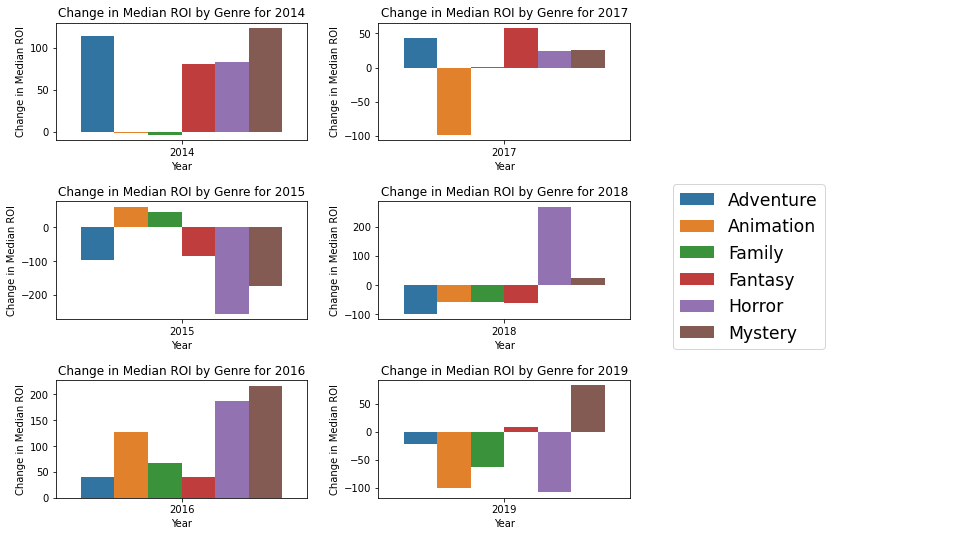

In [14]:
# Create bar plots of yearly change in median ROI for top genres
# Slice yearly_diff_df where genres are in the top 6 by median
yearly_change_top_by_median = yearly_diff_df.loc[yearly_diff_df.genres.isin(list(top_6_by_median.index))]

# Create fig, ax objects, 2 by 3 grid
fig, ax = plt.subplots(3, 3, figsize = (14,8))

# Declare tight layout and padding to prevent overlap
plt.tight_layout(pad = 4.0)

# Set color palette
sns.set_palette('tab10')

# For each year, create a seaborn barplot with the percentage change in median ROI for each genre
for index, year in enumerate(list(yearly_change_top_by_median.year.unique())):
    # Select axis
    axis = ax[index % 3][index // 3]
    
    # Create seaborn barplot
    sns.barplot(data = yearly_change_top_by_median.loc[yearly_change_top_by_median.year == year],
                x = 'year',
                y = 'yearly_diff',
                hue = 'genres',
                ax = axis)
    
    # Set labels and title
    axis.set_xlabel('Year')
    axis.set_ylabel('Change in Median ROI')
    axis.set_title('Change in Median ROI by Genre for {}'.format(year))
    
    # Remove local legend
    axis.get_legend().remove();

# For each of the rightmost 3 axes, turn off all elements
for n in range(3):
    ax[n][2].axis('off')

# Get labels from first graph (which one is irrelevant since they all share the same legend)
lines_labels = [ax[0][0].get_legend_handles_labels()]

# Create lines and labels from above
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

# Create unified legend
fig.legend(lines, labels, bbox_to_anchor = [0.75,0.5], loc='center', fontsize='xx-large');